In [22]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict,\
StratifiedShuffleSplit, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, \
    classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore");

# Регрессия  

	
=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : сезон (1: весна, 2: лето, 3: осень, 4: зима)
	- yr : год (0: 2011, 1: 2012)
	- mnth : месяц (с 1 по 12)
	- hr : час (от 0 до 23)
	- holiday : день погоды выходной или нет (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : день недели
	- workingday : если день не является ни выходным, ни праздничным - 1, в противном случае - 0.
	+ weathersit : 
		- 1: Ясно, Небольшая облачность, Небольшая облачность, Небольшая облачность
		- 2:Туман + Облачность, Туман + Расколотые облака, Туман + Несколько облаков, Туман
		- 3: Небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + Рассеянные облака
		- 4: Сильный дождь + ледяные поддоны + гроза + туман, снег + туман
	- temp : Нормализованная температура в градусах Цельсия. Значения делятся на 41 (макс.)
	- atemp: Нормализовалась температура ощущения в градусах Цельсия. Значения делятся на 50 (макс.)
	- hum: Влажность нормализованная. Значения делятся на 100 (макс.)
	- windspeed: Нормализованная скорость ветра. Значения делятся на 67 (макс.)
	- casual: количество случайных пользователей
	- registered: количество зарегистрированных пользователей
	- cnt: количество велосипедов, взятых напрокат, включая как обычные, так и зарегистрированные


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : подсчеты совместного использования велосипедов агрегированы на почасовой основе. Рекорды: 17379 часов

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.
        
        
Прогнозирование количества проката (cnt) велосипедов **ежечасно** в зависимости от окружающей среды и сезонных условий

файл Bike/hour.csv

In [45]:
df = pd.read_csv('Bike/hour.csv', sep=',')

In [46]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [48]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [49]:
category_features = ["season", "holiday", "mnth", "hr", "yr","weekday", "workingday", "weathersit"]
number_features = ['temp', 'atemp', 'hum', 'windspeed']

In [50]:
for i in range(len(category_features)):
    df.loc[:,category_features[i-1]] = df.loc[:,category_features[i-1]].astype('category')

In [51]:
df.describe(include=['category'])

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4
top,3,1,5,17,0,6,1,1
freq,4496,8734,1488,730,16879,2512,11865,11413


Смотрим на распределение целевой переменной (распределение вероятности)

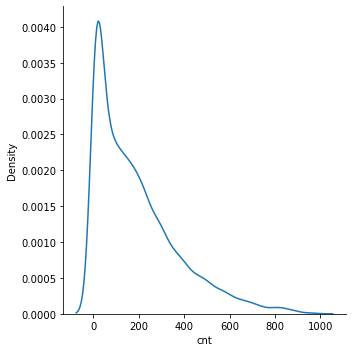

In [52]:
sns.displot(df['cnt'], kind='kde');

При помощи pandas.get_dummies() бинаризуем категориальные данные. И удаляем  ('instant','dteday'). 

Подаем на вход весь датасет, но делаем бинаризацию только по category_features!!

У нас должны остаться также колонки ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [53]:
del df['instant']
del df['dteday']
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


In [167]:
df = pd.get_dummies(df,columns = ["season", "holiday", "mnth", "hr", "yr","weekday", "workingday", "weathersit"] )

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          17379 non-null  float64
 1   atemp         17379 non-null  float64
 2   hum           17379 non-null  float64
 3   windspeed     17379 non-null  float64
 4   casual        17379 non-null  int64  
 5   registered    17379 non-null  int64  
 6   cnt           17379 non-null  int64  
 7   season_1      17379 non-null  uint8  
 8   season_2      17379 non-null  uint8  
 9   season_3      17379 non-null  uint8  
 10  season_4      17379 non-null  uint8  
 11  holiday_0     17379 non-null  uint8  
 12  holiday_1     17379 non-null  uint8  
 13  mnth_1        17379 non-null  uint8  
 14  mnth_2        17379 non-null  uint8  
 15  mnth_3        17379 non-null  uint8  
 16  mnth_4        17379 non-null  uint8  
 17  mnth_5        17379 non-null  uint8  
 18  mnth_6        17379 non-nu

Разбиваем данные на тренировочные и тестовые

In [3]:
y = df.cnt.values



X = df.iloc[:,7:64]
# разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split (
          X, y, test_size = 0.25, random_state = 10)

# стандартизация данных
st = StandardScaler()
X_train_std = st.fit_transform(X_train)

st = StandardScaler()
X_test_std = st.fit_transform(X_test)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [170]:
X.shape[1]

57

In [174]:
class SGD(object):
    def __init__(self, eta=0.001, eps=0.001, iters=100):
        self.eta = eta
        self.eps = eps
        self.iters = iters
   
    def sum_squared_error_cost(self, y, y_pred):
      
        errors = (y - y_pred)
        return (errors**2).sum() / 2.0
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
   
    def predict(self, X):
        return self.net_input(X)
    
    def fit(self, X, y):
  
        # список с ошиками
        self.cost_ = []
        self.w_ = np.zeros(1 + X.shape[1])
        
        
        # Проходим по циклу n-раз:
        for i in range(self.iters):
         

            ind = np.random.choice(X.shape[0], 1)[0]
            x_rand = X[ind]
            y_rand = y[ind]

            self.w_ = np.random.uniform(-100, 100, X.shape[1]+1)
            
            # Находим приближение вектора весов на предыдущей операции (n-1) 
            w_pred = self.w_.copy()
            # Вычисляем вектор ответов на предыдущей итерации
            output = self.net_input(x_rand)
            # вычисляем предварительный loss
            errors = (output - y_rand)
            
        
            # обновляем веса с 1 по n w1_n (пример выше с Dm - произодная)
            self.w_[1:] -= self.eta * 2*x_rand.T.dot(errors)
            # обновляем нулевой вес - w0 (пример выше с Dс - произодная)
            self.w_[0] -= self.eta * 2* errors.sum()
            
            # вычисляем ошибку
            cost = self.sum_squared_error_cost(y_rand, self.net_input(x_rand))
            self.cost_.append(cost)
            
            # Проверяем условие останова
            if abs(np.mean(self.w_ - w_pred)) < self.eps:
                break
                
        return self
    
    

In [175]:
sgd = SGD(eta=0.001, eps=0.001, iters=1500)
sgd.fit(X_train_std, y_train);

In [176]:
y_pred = sgd.predict(X_test_std)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE %:', mape(y_test, y_pred)*100)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 430.5830666669469
MAPE %: 1718.4080520048042
MSE: 271747.327724884
RMSE: 521.293897647847


Применяем стандартный метод для линейной регресии из sklearn

In [4]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression()

In [5]:
y_pred = lr.predict(X_test_std)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE %:', mape(y_test, y_pred)*100)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 3.385754474488529
MAPE %: 3.817402174390287
MSE: 19.264689941733987
RMSE: 4.3891559486687175


# Борьба с переобучением 

Применяем Ridge, Lasso и ElasticNet (sklearn.linear_model)

In [17]:
## Lasso
ls = Lasso(alpha=0.001)
ls.fit(X_train, y_train)

y_pred = ls.predict(X_test)
metrics_regression = pd.DataFrame()
metrics_regression['Lasso'] = [mape(y_test, y_pred)*100]


print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE %:', mape(y_test, y_pred)*100)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.00010659549997259758
MAPE %: 6.807236828482634e-05
MSE: 3.326977666380481e-08
RMSE: 0.00018240004567928378


In [18]:
# Ridge
rg = Ridge(alpha=0.001)
rg.fit(X_train, y_train)

y_pred = rg.predict(X_test)

metrics_regression['Ridge'] = [mape(y_test, y_pred)*100]


print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE %:', mape(y_test, y_pred)*100)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 4.490337933473437e-10
MAPE %: 1.6754707124639782e-09
MSE: 4.382356888443933e-19
RMSE: 6.619937226623779e-10


In [19]:
el = ElasticNet(alpha=0.001)
el.fit(X_train, y_train)

y_pred = el.predict(X_test)

metrics_regression['ElasticNet'] = [mape(y_test, y_pred)*100]

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE %:', mape(y_test, y_pred)*100)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 6.249825941790525e-05
MAPE %: 3.954311727217159e-05
MSE: 1.1441380668590128e-08
RMSE: 0.00010696438972195432


In [20]:
metrics_regression.style.highlight_min(axis=1, color='lightblue')

,Lasso,Ridge,ElasticNet
0,0.000068,0.000000,0.000040


Примените к модели LinearRegression, которую вы уже обучали кросс-валидацию:
    
    1) KFold с 5ю фолдами
    
    2) StratifiedKFold с 5ю фолдами 
   

In [185]:
lr = LinearRegression()
folds = KFold(n_splits = 5, shuffle=True, random_state=10)
scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=folds)

print(f"score KFold = {np.mean(np.abs(scores))}")

score KFold = 77.3131436592958


In [184]:
lr = LinearRegression()

folds = StratifiedKFold(n_splits = 3, shuffle=True,  random_state=10)
scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=folds)

print(f"score StratifiedKFold = {np.mean(np.abs(scores))}")

score StratifiedKFold = 77.32248690948846


# Классификация 

Немного переформулируем задачу, чтобы потренироваться моделировать классификацию, в качестве таргета возьмем признак yr (year)

In [30]:
df = pd.read_csv('Bike/hour.csv', sep=',')

#Удалим holiday, weekday,dteday,  они влияют на целевую переменную yr
df = df.drop(['holiday','weekday', 'dteday', 'workingday'],axis=1)

In [31]:
df

,instant,season,yr,mnth,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,1,0.26,0.2727,0.56,0.1343,13,48,61


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   weathersit  17379 non-null  int64  
 6   temp        17379 non-null  float64
 7   atemp       17379 non-null  float64
 8   hum         17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  casual      17379 non-null  int64  
 11  registered  17379 non-null  int64  
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [33]:
df.describe()

,instant,season,yr,mnth,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
category_features = ['season', 'mnth', 'hr', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [35]:
for i in range(len(category_features)):
    df.loc[:,category_features[i-1]] = df.loc[:,category_features[i-1]].astype('category')

In [36]:
df.describe(include=['category'])

,season,mnth,hr,weathersit
count,17379,17379,17379,17379
unique,4,12,24,4
top,3,5,17,1
freq,4496,1488,730,11413


<AxesSubplot:xlabel='yr', ylabel='count'>

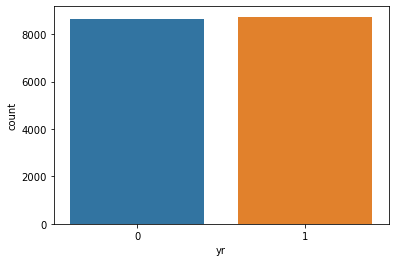

In [37]:
sns.countplot(df['yr'])

In [38]:
df.drop(['instant'], axis=1)
df = pd.get_dummies(df,columns = ['season', 'mnth', 'hr', 'weathersit'] )


In [39]:
del df['instant']

In [40]:
X = df.drop(['yr'], axis = 1)
y = df['yr']

X_train, X_test, y_train, y_test = train_test_split (
          X, y, test_size = 0.25, random_state = 10)


def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [41]:
X_train_std = st.fit_transform(X_train)

st = StandardScaler()
X_test_std = st.fit_transform(X_test)

lg = LogisticRegression(penalty='none', tol=0.001)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
y_score = lg.predict_proba(X_test)[:,1]


print('f1:', f1_score(y_test, y_pred))
print('roc-auc:', roc_auc_score(y_test, y_score))
print('logloss:', log_loss(y_test, y_pred))

f1: 0.6495115558732428
roc-auc: 0.7323792177280397
logloss: 11.693223433200481


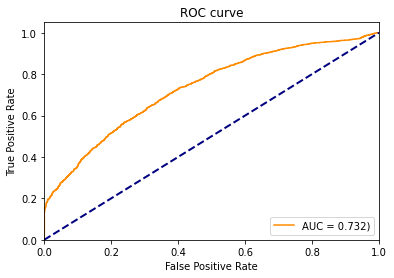

In [201]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# auc - Compute Area Under the Curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')
# const алгоритм - прямая линия
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# масштаб
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# где расположена легенда
plt.legend(loc="lower right")
plt.show()

Попробуем проделать ту же операцию, но с другим регуляризатором - l1 (l2 стандартно применяется) и с solver='liblinear'. 

In [202]:
lg = LogisticRegression(penalty='l1', C=1e5, solver='liblinear')
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
y_score = lg.predict_proba(X_test)[:,1]

print('f1:', f1_score(y_test, y_pred))
print('roc-auc:', roc_auc_score(y_test, y_score))
print('logloss:', log_loss(y_test, y_pred))

f1: 0.6726288538479642
roc-auc: 0.7439552713813629
logloss: 11.057294018710982


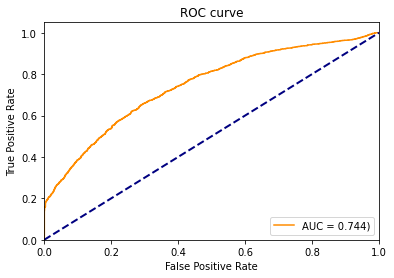

In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# auc - Compute Area Under the Curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')
# const алгоритм - прямая линия
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# масштаб
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# где расположена легенда
plt.legend(loc="lower right")
plt.show()

Применяем к модели LogisticRegression, которую мы уже обучали кросс-валидацию KFold с 3 фолдами для ROC-AUC. Посмотрим на средний score

In [209]:
lr = LogisticRegression()

folds = KFold(n_splits = 3, shuffle=True, random_state=10)
scores = cross_val_score(lr, X, y, scoring='roc_auc', cv=folds)


In [210]:
print(f"score KFold = {scores.mean()} ({np.std(scores)})")

score KFold = 0.7319368304808161 (0.004322157508863506)


# GridSearch 

Найдем параметры для LogisticRegression при помощи GridSearch, RandomizedSearchCV с применением StratifiedKFold с 3 фолдами

Метрика для оптимизации scoring = 'roc_auc'

1) GridSearch

In [213]:
parameters_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.linspace(0.001, 1.0, num = 8),
    'solver' : ['liblinear', 'saga', 'lbfgs'],
    'l1_ratio': np.linspace(0.01, 0.9, num = 2)
}

lr = LogisticRegression()
cv = StratifiedKFold(n_splits=3, shuffle=True)

grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [215]:
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END C=0.001, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.001, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.5s
[CV] END ....C=0.001, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.5s
[CV] END ....C=0.001, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.5s
[CV] END ...C=0.001, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.001, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.01, penalty=

[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.6s
[CV] END C=0.1437142857142857, l1_ratio=0.9, penalty=elastic

[CV] END C=0.42914285714285716, l1_ratio=0.01, penalty=elasticnet, solver=saga; total time=   0.7s
[CV] END C=0.42914285714285716, l1_ratio=0.01, penalty=elasticnet, solver=saga; total time=   0.7s
[CV] END C=0.42914285714285716, l1_ratio=0.01, penalty=elasticnet, solver=saga; total time=   0.7s
[CV] END C=0.42914285714285716, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.42914285714285716, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.42914285714285716, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.42914285714285716, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.42914285714285716, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.42914285714285716, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.42914285714285716, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=0.429142857142857

[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.7145714285714285, l1_ratio=0.01, penalty=l2, solver=liblinear; t

[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.7s
[CV] END C=0.8572857142857143, l1_ratio=0.9, penalty=elastic

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.14371429, 0.28642857, 0.42914286, 0.57185714,
       0.71457143, 0.85728571, 1.        ]),
                         'l1_ratio': array([0.01, 0.9 ]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='roc_auc', verbose=2)

Выведем наилучший скор и параметры

In [217]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'C': 1.0, 'l1_ratio': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.747808073557303


2)RandomizedSearchCV

In [42]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(0.001, 1.0, num=8),
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'l1_ratio': np.linspace(0.01, 0.9, num=2)
}
lr = LogisticRegression()
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = RandomizedSearchCV(lr, parameters_grid, scoring='roc_auc', cv=cv, n_iter=3, verbose=0)
grid_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=LogisticRegression(), n_iter=3,
                   param_distributions={'C': array([0.001     , 0.14371429, 0.28642857, 0.42914286, 0.57185714,
       0.71457143, 0.85728571, 1.        ]),
                                        'l1_ratio': array([0.01, 0.9 ]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga',
                                                   'lbfgs']},
                   scoring='roc_auc')

Выведем наилучший скор и параметры

In [43]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 0.01, 'C': 0.42914285714285716}
0.7451246724130186
